## HW2: Linear Discriminant Analysis
In hw2, you need to implement [Fisher’s linear discriminant](https://towardsdatascience.com/fishers-linear-discriminant-intuitively-explained-52a1ba79e1bb) by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get **zero point** by simply calling `sklearn.discriminant_analysis.LinearDiscriminantAnalysis` 

## Load data

In [1]:
import pandas as pd
import numpy as np

In [2]:
x_train = pd.read_csv("x_train.csv").values
y_train = pd.read_csv("y_train.csv").values[:,0]
x_test = pd.read_csv("x_test.csv").values
y_test = pd.read_csv("y_test.csv").values[:,0]

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(750, 2)
(750,)
(250, 2)
(250,)


## 1. Compute the mean vectors mi, (i=1,2) of each 2 classes

In [4]:
## Your code HERE
# Seperate two classes
class1 = x_train[np.where(y_train == 0)]
class2 = x_train[np.where(y_train == 1)]

# Calculate average of each class
m1 = np.mean(class1, axis=0)
m2 = np.mean(class2, axis=0)

In [5]:
print(f"mean vector of class 1: {m1}", f"mean vector of class 2: {m2}")

mean vector of class 1: [2.47107265 1.97913899] mean vector of class 2: [1.82380675 3.03051876]


## 2. Compute the Within-class scatter matrix SW

In [6]:
## Your code HERE
# Use the formula to calculate sw
sw1 = (class1 - m1).T.dot(class1 - m1)
sw2 = (class2 - m2).T.dot(class2 - m2)
sw = sw1 + sw2
sw

array([[140.40036447,  -5.30881553],
       [ -5.30881553, 138.14297637]])

In [7]:
assert sw.shape == (2,2)
print(f"Within-class scatter matrix SW: {sw}")

Within-class scatter matrix SW: [[140.40036447  -5.30881553]
 [ -5.30881553 138.14297637]]


## 3.  Compute the Between-class scatter matrix SB

In [8]:
## Your code HERE
# Use the formula to calculate sb
sb = np.outer((m1 - m2), (m1 - m2).T)  # outer production 
sb

array([[ 0.41895314, -0.68052227],
       [-0.68052227,  1.10539942]])

In [9]:
assert sb.shape == (2,2)
print(f"Between-class scatter matrix SB: {sb}")

Between-class scatter matrix SB: [[ 0.41895314 -0.68052227]
 [-0.68052227  1.10539942]]


## 4. Compute the Fisher’s linear discriminant

In [10]:
## Your code HERE
# w is proportional to (sw^(-1))(m1-m2), norm to get unit vector.
inv_sw = np.linalg.inv(sw)
w = (inv_sw.dot(m2 - m1))
w /= np.linalg.norm(w)
w

array([-0.50266214,  0.86448295])

In [11]:
assert w.shape == (2,)
print(f" Fisher’s linear discriminant: {w}")

 Fisher’s linear discriminant: [-0.50266214  0.86448295]


## 5. Project the test data by linear discriminant and get the class prediction by nearest-neighbor rule.  Calculate the accuracy score 
you can use `accuracy_score` function from `sklearn.metric.accuracy_score`

In [12]:
# calculate the Euclidean distance between two vectors
from math import sqrt
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for i, train_row in enumerate(train):
        dist = euclidean_distance(test_row, train_row)
        distances.append((i, train_row, dist))
        distances.sort(key=lambda tup: tup[2])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])    
    return neighbors

 # Make a classification prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [y_train[row] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

In [13]:
# Test all testing data
y_pred = np.empty(len(x_test))
for i in range(len(x_test)):
    prediction = predict_classification(x_train, x_test[i], 5)
    y_pred[i] = prediction

In [14]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc

0.912

In [15]:
print(f"Accuracy of test-set {acc}")

Accuracy of test-set 0.912


### Neasrest number of points record
nearest 1 points, acc = 0.872  
nearest 3 points, acc = 0.804  
nearest 5 points, acc = 0.912  
nearest 7 points, acc = 0.896

Thus, finally choose neast 5 points.

## 6. Plot the 1) best projection line on the training data and show the slope and intercept on the title (you can choose any value of intercept for better visualization) 2) colorize the data with each class 3) project all data points on your projection line. Your result should look like [this image](https://i.imgur.com/tubMQpw.jpg)

slope =  -1.7198091369913981
intercept =  0.8644829487123293


Text(0.5, 1.0, 'Project Line w = -1.7198091369913981, b = 0.8644829487123293')

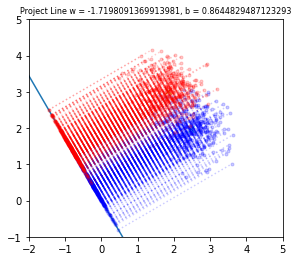

In [16]:
import matplotlib.pyplot as plt
plt.plot([-5*w[0], 5*w[0]], [-5*w[1], 5*w[1]])
plt.plot(m1[0], m1[1], 'cx')
plt.plot(m2[0], m2[1], 'yx')
plt.gca().axis('square')

# Project data point on it
r = w.reshape(2,)
n2 = np.linalg.norm(r)**2
for pt in class1:
    prj = r * r.dot(pt) / n2
    plt.plot([prj[0], pt[0]], [prj[1], pt[1]], 'b.:', alpha=0.2)
for pt in class2:
    prj = r * r.dot(pt) / n2
    plt.plot([prj[0], pt[0]], [prj[1], pt[1]], 'r.:', alpha=0.2)

slope = w[1] / w[0]
print('slope = ', slope)
intercept = 0-slope*(-w[0])
print('intercept = ', intercept)

plt.plot(figsize=(15,15))
plt.xlim([-2,5])
plt.ylim([-1,5])
plt.title('Project Line w = {}, b = {}'.format(slope, intercept),
         fontsize = 8)